### Figure 10. 
#### Doing a few wind composites in similar fashion of this ones: https://github.com/adele157/easterlies-collaborative-project/blob/master/notebooks/figures/Figure-1.ipynb
#### Also doing an Ekman for the wind+ products 

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import cosima_cookbook as cc
import dask.distributed as dsk
import glob
import matplotlib.gridspec as gs
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
import matplotlib.colors as mcolors

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

figdir = '/home/561/jn8053/g_e14/figures-tmp/easterlies-collaborative/'
figdir = '/g/data/v45/akm157/figures/easterlies/paper_figures/'

clnt = dsk.Client()
clnt

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/35399/status,
Dashboard: /proxy/35399/status,Workers: 1
Total threads: 1,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35195,Workers: 1
Dashboard: /proxy/35399/status,Total threads: 1
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:40125,Total threads: 1
Dashboard: /proxy/45673/status,Memory: 100.00 GiB
Nanny: tcp://127.0.0.1:43531,


## creating variables for the model composite first

In [2]:
#session_ryf = cc.database.create_session()
master_session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
control = '01deg_jra55v13_ryf9091'
iaf_cycle3 = '01deg_jra55v140_iaf_cycle3'

first_year = '1958'
last_year = '2018'

start_time=first_year+'-01-01'
end_time=last_year+'-12-31'

time_period = str(int(start_time[:4]))+'-'+str(int(end_time[:4]))


### prepare winds (taux)

In [3]:
lat_slice  = slice(-75.5,-60)
lon_slice  = slice(-256, -246)

windX_con = cc.querying.getvar(iaf_cycle3,'tau_x', master_session,frequency='1 monthly',start_time=start_time, end_time=end_time)
windX_con = windX_con.sel(yu_ocean=lat_slice).sel(xu_ocean=lon_slice)                            
windX_con = windX_con.load()

#windX_up = cc.querying.getvar(easterlies_up_meridional,'tau_x',master_session,frequency='1 monthly',start_time=start_time, end_time=end_time) 
#windX_upY = windX_up.sel(yu_ocean=lat_slice).sel(xu_ocean=lon_slice)                     
#windX_upY = windX_upY.load()

#windX_up = cc.querying.getvar(easterlies_up_zonal,'tau_x', master_session,frequency='1 monthly',start_time=start_time, end_time=end_time)
#windX_upX = windX_up.sel(yu_ocean=lat_slice).sel(xu_ocean=lon_slice)                         
#windX_upX = windX_upX.load()

In [4]:
#rlist = cc.querying.get_variables(master_session, easterlies_up_zonal)
#varlist[varlist['name'].str.lower().str.match('tau')]

### prepare winds (tauy)

In [5]:
lat_slice  = slice(-75.5,-60)
lon_slice  = slice(-256, -246)

windY_con = cc.querying.getvar(iaf_cycle3,'tau_y', master_session,frequency='1 monthly',start_time=start_time, end_time=end_time)
windY_con = windY_con.sel(yu_ocean=lat_slice).sel(xu_ocean=lon_slice)                            
windY_con = windY_con.load()

#windY_up = cc.querying.getvar(easterlies_up_meridional,'tau_y',master_session,frequency='1 monthly',start_time=start_time, end_time=end_time) 
#windY_upY = windY_up.sel(yu_ocean=lat_slice).sel(xu_ocean=lon_slice)                     
#windY_upY = windY_upY.load()

#windY_up = cc.querying.getvar(easterlies_up_zonal,'tau_y', master_session,frequency='1 monthly',start_time=start_time, end_time=end_time)
#windY_upX = windY_up.sel(yu_ocean=lat_slice).sel(xu_ocean=lon_slice)                         
#windY_upX = windY_upX.load()

In [6]:
windX_con = windX_con.mean('time')
#windX_upX = windX_upX.mean('time')
#windX_upY = windX_upY.mean('time')

windY_con = windY_con.mean('time')
#windY_upX = windY_upX.mean('time')
#windY_upY = windY_upY.mean('time')

In [7]:
windX_con = windX_con.load()
#windX_upX = windX_upX.load()
#windX_upY = windX_upY.load()

windY_con = windY_con.load()
#windY_upX = windY_upX.load()
#windY_upY = windY_upY.load()

### Load bathymetry

In [8]:
#have to load this again
lat_slice  = slice(-75.5,-60)
lon_slice  = slice(-275, -230)

# import bathymetry and the land/ocean mask to add to plot:
ht = cc.querying.getvar(control,'ht' , master_session,n=1)
ht = ht.sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)
# create land mask from the bathymetry:
land_mask = np.squeeze(ht.values)*0
land_mask[np.isnan(land_mask)]=1
land_mask = np.where(land_mask==1,land_mask,np.nan)

### plot wind composites 

In [9]:
import cmocean

In [10]:
pwd

'/home/581/ns3783/Scripts/Figures/Current'

In [15]:
np.min(windX_con)

<xarray.DataArray 'tau_x' ()>
array(-0.24747588)

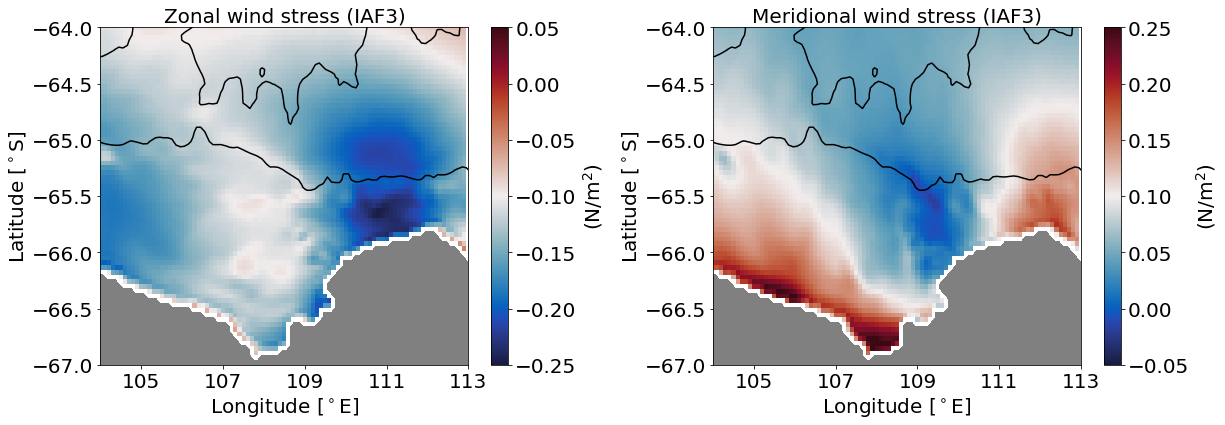

In [24]:
fontsize=20

#for nt in range(0,nframes):
fig=plt.figure(figsize=(25, 22))
fig.subplots_adjust(top=0.88)

ax0=plt.subplot(431) 
pc = plt.pcolormesh(windX_con.xu_ocean, windX_con.yu_ocean,windX_con,cmap = cmocean.cm.balance, 
                        vmin=-0.25,vmax=0.05)
#plt.title('Anomaly for Str Heat Flux (Y) yrs',fontsize=fontsize)
plt.title('Zonal wind stress (IAF3)',fontsize=fontsize)
        #plot contours
plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidth=.5)
        # plot the land:
plt.contourf(ht.xt_ocean,ht.yt_ocean,land_mask,colors='grey')
        # labels etc:
        #plt.xlabel('Longitude',fontsize=fontsize)
plt.ylabel('Latitude [$^\circ$S]',fontsize=fontsize)
plt.xlabel('Longitude [$^\circ$E]',fontsize=fontsize)

plt.tick_params(labelsize=fontsize)
        #lim
plt.ylim((-67, -64))
plt.xlim((-255, -246))
        # colorbar:
cbar=plt.colorbar(pc,orientation='vertical',extend='neither')
cbar.ax.locator_params(nbins=8)
cbar.set_label(r'(N/m$^{2}$)', fontsize = 20,labelpad=5)
cbar.ax.tick_params(labelsize=20)
ax0.set_xticklabels([-255+359,-254+359,-252+359,-250+359,-248+359,-246+359])

ax0=plt.subplot(432) 
pc = plt.pcolormesh(windY_con.xu_ocean, windY_con.yu_ocean,windY_con,cmap = cmocean.cm.balance, 
                        vmin=-0.05,vmax=0.25)
#plt.title('Anomaly for Str Heat Flux (Y) yrs',fontsize=fontsize)
plt.title('Meridional wind stress (IAF3)',fontsize=fontsize)
        #plot contours
plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidth=.5)
        # plot the land:
plt.contourf(ht.xt_ocean,ht.yt_ocean,land_mask,colors='grey')
        # labels etc:
        #plt.xlabel('Longitude',fontsize=fontsize)
plt.ylabel('Latitude [$^\circ$S]',fontsize=fontsize)
plt.xlabel('Longitude [$^\circ$E]',fontsize=fontsize)

plt.tick_params(labelsize=fontsize)
        #lim
plt.ylim((-67, -64))
plt.xlim((-255, -246))
        # colorbar:
cbar=plt.colorbar(pc,orientation='vertical',extend='neither')
cbar.ax.locator_params(nbins=8)
cbar.set_label(r'(N/m$^{2}$)', fontsize = 20,labelpad=5)
cbar.ax.tick_params(labelsize=20)
ax0.set_xticklabels([-255+359,-254+359,-252+359,-250+359,-248+359,-246+359])

fig.tight_layout()

#save_results_to = '/g/data/jk72/ns3783/'
save_results_to = '/home/581/ns3783/Scripts/Figures/Final_fig'
#plt.savefig(save_results_to + 'Corr_T&zonal.png', dpi=120,bbox_inches='tight', pad_inches=0.1)
plt.savefig(save_results_to + 'Fig4_windstressIAF.png', dpi=120,bbox_inches='tight', pad_inches=0.1)

In [16]:
print(np.min(windY_con))
print(np.max(windY_con))

<xarray.DataArray 'tau_y' ()>
array(-0.01878796)
<xarray.DataArray 'tau_y' ()>
array(0.27161527)


### correlation of Ekman for easterlies 

In [44]:
#tem que repetir aqui a lat pq esta interferindo no tamanho da matriz no final d calculo
#lon_slice  = slice(-252.5, -250.5) # best for time series
#lat_slice  = slice(-67.5, -63) best for time series

lon_slice  = slice(-256, -247) 
lat_slice  = slice(-75.5,-60) 


# these are the values used by MOM5
sigma = 7.292e-5     # Earth's rotation rate in radians/s
Rearth = 6371.e3 # Earth's radius in m
variable='geolat_c'
geolat_c = cc.querying.getvar(control,'geolat_c',master_session, n=-1).sel(yu_ocean=lat_slice).sel(xu_ocean=lon_slice)

f = 2 * sigma * np.sin(np.deg2rad(geolat_c)) # convert lat in radians


In [54]:
# pick the northern latitude, so there are an equal number of t-cell and u-cell gridpoint in this range:
lon_slice  = slice(-256, -247) 
lat_slice  = slice(-75.5,-60) 

start_time='2150-01-01'   #try with 2150 again?
end_time='2159-12-31'

tau_x_con = cc.querying.getvar(easterlies_up_meridional,'tau_x',master_session,frequency='1 monthly',start_time=start_time, end_time=end_time) 
tau_x_con = tau_x_con.sel(yu_ocean=lat_slice).sel(xu_ocean=lon_slice)                     
tau_x_con = tau_x_con.load()

tau_y_con = cc.querying.getvar(easterlies_up_meridional, 'tau_y', master_session, frequency='1 monthly',start_time=start_time, end_time=end_time).sel(yu_ocean=lat_slice).sel(xu_ocean=lon_slice)
tau_y_con = tau_y_con.load()

In [55]:
# database for control simulation:
control = '01deg_jra55v13_ryf9091'

# Need to use these unmasked dxu and dyu, because otherwise it spreads the mask and we miss the Ekman pumping in the first ocean cell.

tau_x_con_full = cc.querying.getvar(control, 'tau_x', master_session, ncfile='ocean_month.nc',start_time=start_time, end_time=end_time)
dyu = cc.querying.getvar(control, 'dyu', master_session, n=1)
dyu['ni'] = tau_x_con_full['xu_ocean'].values
dyu['nj'] = tau_x_con_full['yu_ocean'].values
#dyu = dyu.rename(({'nk':'time','ni':'xu_ocean', 'nj':'yu_ocean'}))
dyu = dyu.rename(({'ni':'xu_ocean', 'nj':'yu_ocean'}))
dyu = dyu.sel(yu_ocean=lat_slice)

dxu = cc.querying.getvar(control, 'dxu', master_session, n=1)
dxu['ni'] = tau_x_con_full['xu_ocean'].values
dxu['nj'] = tau_x_con_full['yu_ocean'].values
#dxu = dxu.rename(({'nk':'time','ni':'xu_ocean', 'nj':'yu_ocean'}))
dxu = dxu.rename(({'ni':'xu_ocean', 'nj':'yu_ocean'}))
dxu = dxu.sel(yu_ocean=lat_slice)

In [56]:
# See https://cosima-recipes.readthedocs.io/en/latest/documented_examples/RelativeVorticity.html#gallery-documented-examples-relativevorticity-ipynb
#ds = xr.open_mfdataset('/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output000/ocean/ocean_grid.nc', combine='by_coords')
#inverse_dxtn = 0.5*(1/ds.dxu + np.roll(1/ds.dxu, 1, axis=1))
#inverse_dyte = 0.5*(1/ds.dyu + np.roll(1/ds.dyu, 1, axis=1))

# use dyu from above, because otherwise the nans from land spread:
inverse_dyte = 0.5*(1/dyu + np.roll(1/dyu, 1, axis=0))
inverse_dxtn = 0.5*(1/dxu + np.roll(1/dxu, 1, axis=0))

# fill land with zeros:
tauy_f_con = tau_y_con/f
tauy_f_con = tauy_f_con.fillna(0)
taux_f_con = tau_x_con/f
taux_f_con = taux_f_con.fillna(0)

In [57]:
# compute derivatives:
#d_dx_tauyf_con = (tauy_f_con - np.roll(tauy_f_con, 1, axis=1))*inverse_dxtn
d_dx_tauyf_con = (tauy_f_con - np.roll(tauy_f_con, 1, axis=2))*inverse_dxtn
#d_dy_tauxf_con = (taux_f_con - np.roll(taux_f_con, 1, axis=0))*inverse_dyte
d_dy_tauxf_con = (taux_f_con - np.roll(taux_f_con, 1, axis=1))*inverse_dyte

# interpolate onto the same grid:
#d_dx_tauyf_con = 0.5 * (d_dx_tauyf_con + np.roll(d_dx_tauyf_con, 1, axis=0))
d_dx_tauyf_con = 0.5 * (d_dx_tauyf_con + np.roll(d_dx_tauyf_con, 1, axis=1))
#d_dy_tauxf_con = 0.5 * (d_dy_tauxf_con + np.roll(d_dy_tauxf_con, 1, axis=1))
d_dy_tauxf_con = 0.5 * (d_dy_tauxf_con + np.roll(d_dy_tauxf_con, 1, axis=2))

# compute curl:
curl_tauf_con = d_dx_tauyf_con - d_dy_tauxf_con
curl_tauf_con = curl_tauf_con.load()

#convert from m/s to m/day
s_day=60*60*24
rho0 = 1035.
ekman_con = curl_tauf_con/rho0*s_day

# mask land:
ekman_con = ekman_con.where(ekman_con!=0)

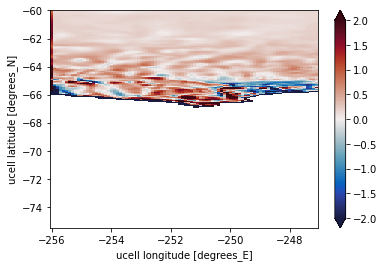

In [59]:
# quick check that this looks ok:
ekman_con.mean('time').plot(vmin=-2,vmax=2,cmap=cmocean.cm.balance)

In [60]:
ekman_con=ekman_con.load()

In [61]:
# Note we need to first detrend the data:
ekman_con_detrended = detrend_dim(ekman_con,'time')
ekman_con_dr = ekman_con_detrended.rolling(time=12, center=True).mean()


### things in this code I am no longer using

In [ ]:

ax0=plt.subplot(433) 
pc = plt.pcolormesh(windY_upY.xu_ocean, windY_upY.yu_ocean,windY_upY,cmap = cmocean.cm.balance, 
                        vmin=-0.3,vmax=0.3)
#plt.title('Anomaly for Str Heat Flux (Y) yrs',fontsize=fontsize)
plt.title('WIND+$_{meridional}$',fontsize=fontsize)
        #plot contours
plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidth=.5)
        # plot the land:
plt.contourf(ht.xt_ocean,ht.yt_ocean,land_mask,colors='grey')
        # labels etc:
        #plt.xlabel('Longitude',fontsize=fontsize)
#plt.ylabel('Meridional wind stress',fontsize=fontsize)
#plt.xlabel('Longitude',fontsize=fontsize)

plt.tick_params(labelsize=fontsize)
        #lim
plt.ylim((-67.5, -63))
plt.xlim((-255, -247.5))
        # colorbar:
cbar=plt.colorbar(pc,orientation='vertical',extend='neither')
cbar.ax.locator_params(nbins=8)
cbar.set_label(r'(N/m$^{2}$)', fontsize = 16,labelpad=5)
cbar.ax.tick_params(labelsize=16)

ax0=plt.subplot(434) 
pc = plt.pcolormesh(windX_con.xu_ocean, windX_con.yu_ocean,windX_con,cmap = cmocean.cm.balance, 
                        vmin=-0.3,vmax=0.3)
#plt.title('Anomaly for Str Heat Flux (Y) yrs',fontsize=fontsize)
#plt.title('Control',fontsize=fontsize)
        #plot contours
plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidth=.5)
        # plot the land:
plt.contourf(ht.xt_ocean,ht.yt_ocean,land_mask,colors='grey')
        # labels etc:
        #plt.xlabel('Longitude',fontsize=fontsize)
plt.ylabel('Zonal wind stress',fontsize=fontsize)

plt.tick_params(labelsize=fontsize)
        #lim
plt.ylim((-67.5, -63))
plt.xlim((-255, -247.5))
        # colorbar:
cbar=plt.colorbar(pc,orientation='vertical',extend='neither')
cbar.ax.locator_params(nbins=8)
cbar.set_label(r'(N/m$^{2}$)', fontsize = 16,labelpad=5)
cbar.ax.tick_params(labelsize=16)

ax0=plt.subplot(435) 
pc = plt.pcolormesh(windX_upX.xu_ocean, windX_upX.yu_ocean,windX_upX,cmap = cmocean.cm.balance, 
                        vmin=-0.3,vmax=0.3)
#plt.title('Anomaly for Str Heat Flux (Y) yrs',fontsize=fontsize)
#plt.title('WIND+$_{zonal}$',fontsize=fontsize)
        #plot contours
plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidth=.5)
        # plot the land:
plt.contourf(ht.xt_ocean,ht.yt_ocean,land_mask,colors='grey')
        # labels etc:
        #plt.xlabel('Longitude',fontsize=fontsize)
#plt.ylabel('Meridional wind stress',fontsize=fontsize)
#plt.xlabel('Longitude',fontsize=fontsize)

plt.tick_params(labelsize=fontsize)
        #lim
plt.ylim((-67.5, -63))
plt.xlim((-255, -247.5))
        # colorbar:
cbar=plt.colorbar(pc,orientation='vertical',extend='neither')
cbar.ax.locator_params(nbins=8)
cbar.set_label(r'(N/m$^{2}$)', fontsize = 16,labelpad=5)
cbar.ax.tick_params(labelsize=16)

ax0=plt.subplot(436) 
pc = plt.pcolormesh(windX_upY.xu_ocean, windX_upY.yu_ocean,windX_upY,cmap = cmocean.cm.balance, 
                        vmin=-0.3,vmax=0.3)
#plt.title('Anomaly for Str Heat Flux (Y) yrs',fontsize=fontsize)
#plt.title('WIND+$_{meridional}$',fontsize=fontsize)
        #plot contours
plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidth=.5)
        # plot the land:
plt.contourf(ht.xt_ocean,ht.yt_ocean,land_mask,colors='grey')
        # labels etc:
        #plt.xlabel('Longitude',fontsize=fontsize)
#plt.ylabel('Meridional wind stress',fontsize=fontsize)
#plt.xlabel('Longitude',fontsize=fontsize)

plt.tick_params(labelsize=fontsize)
        #lim
plt.ylim((-67.5, -63))
plt.xlim((-255, -247.5))
        # colorbar:
cbar=plt.colorbar(pc,orientation='vertical',extend='neither')
cbar.ax.locator_params(nbins=8)
cbar.set_label(r'(N/m$^{2}$)', fontsize = 16,labelpad=5)
cbar.ax.tick_params(labelsize=16)

figdir = '/g/data/jk72/ns3783'
filestr = figdir+'/fig10_wind+_composite.png'
plt.savefig(filestr,dpi=600,bbox_inches='tight')